### **Imports Made**:
- Numpy for general purpose tasks (ex: file loads, matrix operations and arrangements, etc)
- sklearn.linear_model for the multiple models tested
- sklearn.mixture for Gaussian Mixture Model
- data_spliter for splitting the data into training and testing sets
- matplotlib.pyplot for plotting the data

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from sklearn.metrics import balanced_accuracy_score

In [5]:
#X_train = np.load("x_train.npy")
#y_train = np.load("y_train.npy")
X_train = np.load("x_smote.npy")
y_train = np.load("y_smote.npy")
x_project = np.load("Xtest_Classification1.npy")
X_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")

print(X_train.shape,y_train.shape,x_project.shape,X_test.shape,y_test.shape)

(8560, 28, 28, 3) (8560, 2) (1764, 2352) (1251, 28, 28, 3) (1251, 2)


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3),kernel_initializer="he_uniform", kernel_regularizer=l2(0.01), input_shape=(28, 28, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, kernel_size=(3, 3),kernel_initializer="he_uniform", kernel_regularizer=l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(128, kernel_size=(3, 3),kernel_initializer="he_uniform", kernel_regularizer=l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.35),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    
    tf.keras.layers.Dense(2, activation="softmax")
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose = 3, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test) ,callbacks=[early_stopping])

# Extract accuracy values from the training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')


Epoch 1/10
134/134 [==============================] - 9s 52ms/step - loss: 2.8167 - accuracy: 0.7571 - val_loss: 2.5678 - val_accuracy: 0.1383
Epoch 2/10
134/134 [==============================] - 7s 49ms/step - loss: 1.0859 - accuracy: 0.7940 - val_loss: 2.7114 - val_accuracy: 0.1383
Epoch 3/10
134/134 [==============================] - 6s 47ms/step - loss: 0.7328 - accuracy: 0.8013 - val_loss: 1.8557 - val_accuracy: 0.1535
Epoch 4/10
134/134 [==============================] - 6s 47ms/step - loss: 0.6224 - accuracy: 0.8056 - val_loss: 1.7329 - val_accuracy: 0.2222
Epoch 5/10
134/134 [==============================] - 7s 49ms/step - loss: 0.5750 - accuracy: 0.8072 - val_loss: 1.7081 - val_accuracy: 0.1639
Epoch 6/10
134/134 [==============================] - 7s 53ms/step - loss: 0.5474 - accuracy: 0.8057 - val_loss: 1.2619 - val_accuracy: 0.3094
Epoch 7/10
122/134 [==========================>...] - ETA: 0s - loss: 0.5391 - accuracy: 0.8125

KeyboardInterrupt: 

In [ ]:
y_predi = model.predict(X_test)

for i in y_predi:
    if i[0]>i[1]:
        i[0]=1
        i[1]=0
    else:
        i[0]=0
        i[1]=1
        
print(y_predi[:,0])
balanced_accuracy = balanced_accuracy_score(y_test, y_predi)
print("Balanced Accuracy Score:", balanced_accuracy)

51/51 [==============================] - 0s 5ms/step
[0. 0. 1. ... 0. 0. 1.]


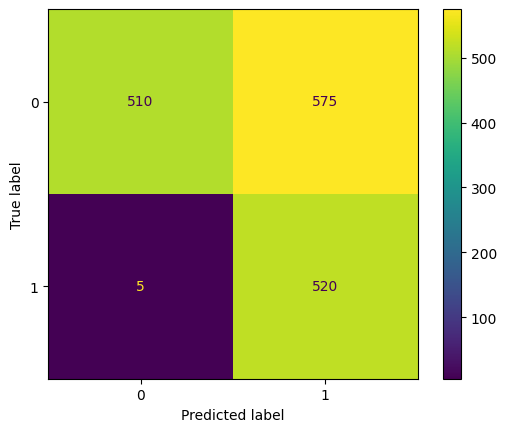

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_predi[:,0],y_test[:,0])
cm_display=ConfusionMatrixDisplay(cm).plot()